<a href="https://colab.research.google.com/github/thanhcdt1820/Homeworks-_W9/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
# keras: dat bien theo keras (ko dc tuy y)

In [ ]:
from keras.datasets import cifar100
# load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
X=x_test
y=y_test

In [ ]:
x_train.shape
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

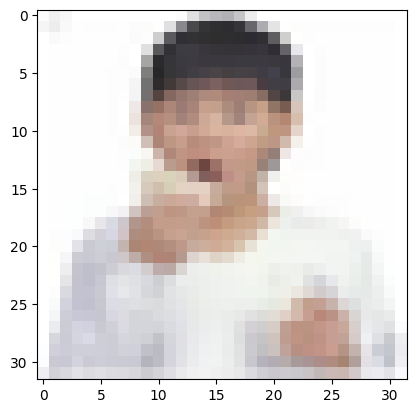

Hinh này là:  [11]


In [ ]:
digit = x_train[181]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('Hinh này là: ', y_train[181])

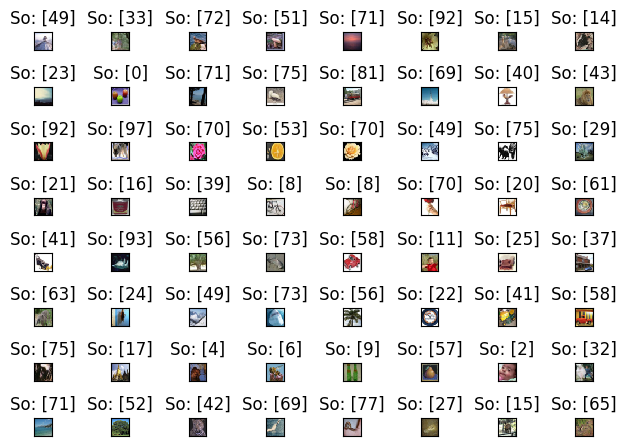

In [ ]:
for i in range(64):
  plt.subplot(8,8,i+1)  #ve hinh co 5hang 5cot, i+1: vi tri tuong tac
  plt.tight_layout()
  plt.imshow(x_test[i],cmap='gray',interpolation='none')
  plt.title('So: {}'.format(y_test[i])) # gan nhan cho so
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1000,activation = 'relu', input_shape = (3072,)))

In [ ]:
model.add(Dense(100, activation = 'Softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1000)              3073000   
                                                                 
 dense_18 (Dense)            (None, 100)               100100    
                                                                 
Total params: 3,173,100
Trainable params: 3,173,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
x_test.shape

(10000, 3072)

In [ ]:
from keras.utils import to_categorical        #chuyen du lieu ve 1 va 0
y_train = to_categorical(y_train, 100)  
y_test = to_categorical(y_test, 100)

In [ ]:
y_train.shape

(50000, 100)

In [ ]:
y_test.shape

(10000, 100)

In [ ]:
model.compile(optimizer='rmsprop',loss ='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10, batch_size=128)
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Mat Mat:",test_loss)
print("Do chinh xac:",test_acc)

Epoch 1/10
391/391 [==============================] - 24s 60ms/step - loss: 4.3307 - accuracy: 0.0688
Epoch 2/10
391/391 [==============================] - 23s 60ms/step - loss: 3.7640 - accuracy: 0.1316
Epoch 3/10
391/391 [==============================] - 24s 61ms/step - loss: 3.6134 - accuracy: 0.1571
Epoch 4/10
391/391 [==============================] - 24s 60ms/step - loss: 3.5182 - accuracy: 0.1757
Epoch 5/10
391/391 [==============================] - 24s 61ms/step - loss: 3.4476 - accuracy: 0.1883
Epoch 6/10
391/391 [==============================] - 24s 63ms/step - loss: 3.3915 - accuracy: 0.1981
Epoch 7/10
391/391 [==============================] - 24s 62ms/step - loss: 3.3383 - accuracy: 0.2072
Epoch 8/10
391/391 [==============================] - 25s 63ms/step - loss: 3.2990 - accuracy: 0.2183
Epoch 9/10
391/391 [==============================] - 24s 62ms/step - loss: 3.2614 - accuracy: 0.2263
Epoch 10/10
313/313 [==============================] - 3s 9ms/step - loss: 3.4570 

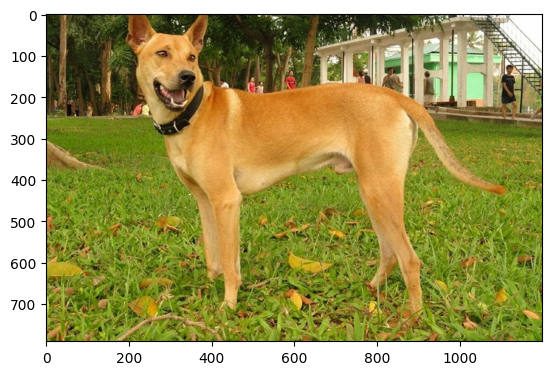

In [ ]:
img = plt.imread('cho.jpg')
plt.imshow(img)
plt.show()

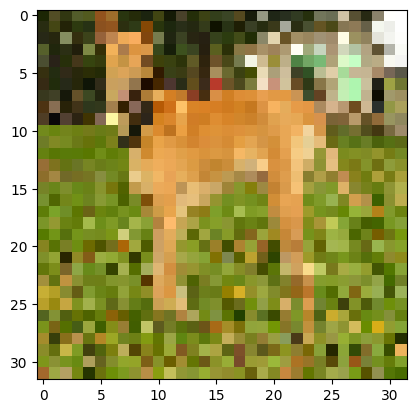

In [ ]:
from keras.utils import load_img,img_to_array
img = load_img('cho.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 56ms/step


array([92])